In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")

In [4]:
X=df.iloc[:,[2,3]].values
Y=df.iloc[:,4].values

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [6]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
#fit traing data in logistic regression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [8]:
#predict the result
y_pred = classifier.predict(X_test)

In [9]:
cm=confusion_matrix(y_test,y_pred)
print("Confusion matrix")
print(cm)

Confusion matrix
[[57  1]
 [ 5 17]]


In [10]:
ac=accuracy_score(y_test,y_pred)
print("Accuraacy Score")
print(ac)

Accuraacy Score
0.925


In [11]:
# Error Rate
error_rate = 1 - ac
print("Error Rate:", error_rate)

Error Rate: 0.07499999999999996


In [12]:
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.9444444444444444


In [13]:
recall = recall_score(y_test, y_pred)
print("Recall", recall)

Recall 0.7727272727272727


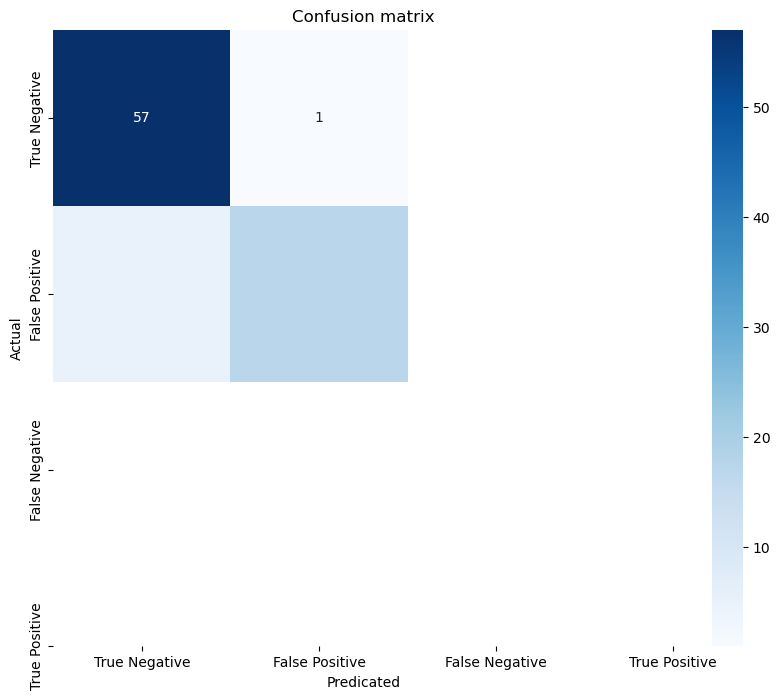

In [14]:
#plot the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels,)
plt.xlabel("Predicated")
plt.ylabel("Actual")
plt.title("Confusion matrix")
plt.show()

In [15]:
print(f"TN value is {cm[0][0]}")
print(f"FP value is {cm[0][1]}")
print(f"FN value is {cm[1][0]}")
print(f"TP value is {cm[1][1]}")

TN value is 57
FP value is 1
FN value is 5
TP value is 17


In [16]:
def gender_encoder(value):
    if (value == "Male"):
        return 1
    elif (value == "Female"):
        return 0
    else:
        return -1

In [17]:
df["Gender"] = df["Gender"].apply(gender_encoder)

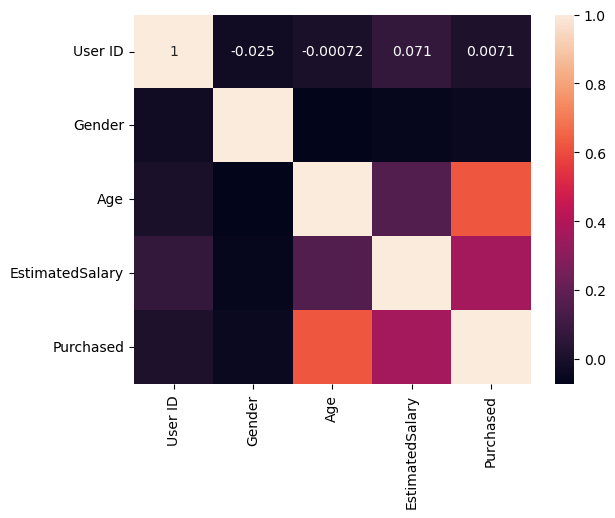

In [18]:
sns.heatmap(df.corr(), annot=True)
plt.show()